<br>

# Southern Ladies Lunching


Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:
Brief Description. Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.

What can you infer about the relationships between (1) the women, and (2) the social events?  

DESCRIPTION One 18×14 matrix, binary.

BACKGROUND These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise.

REFERENCES

Breiger R. (1974). The duality of persons and groups. Social Forces, 53, 181-190.
Davis, A et al. (1941). Deep South. Chicago: University of Chicago Press.

## Importing the Davis Southern Women data set

Setting up our python environment by importing the libraries used throughout the analysis.  

Following, we import the [Davis Southern Women data set](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html) from `networkx`:  

In [1]:
# import python libraries used in analysis
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

Importing the graph network

In [26]:
# import the Davis Southern Women graph
G = nx.davis_southern_women_graph()
# generate two lists for the women and the events nodes respectively
women = G.graph["top"]
events = G.graph["bottom"]

<br>

## Visual exporation of the data

The graph objects `women` and `events` have been loaded into the python environment. Before joining the two as a bipartate network, they are visualized independently here:

### Women network

create a network of women where edges are established if the women have attended the same events  

steps:
1. build a dictionary that holds values for every event a woman attended
2. define edges is the women have attended the same events, attribute for how many events
3. visualize the women graph network
4. inspecting connectivity & discussion

#### 1) a dictionary of women

In [23]:
# split the edge tuples into a tuple of women and events
split_edges = list(zip(*list( G.edges() ) ) )
#create a dictionary that holds the events each woman attended
women_dict = {}
for woman in women:
    # build a list of events for a specific woman
    her_events = [split_edges[1][idx] for idx,w in enumerate(split_edges[0]) if w == woman ]
    # asign as a value with her name as the key
    women_dict[ woman ] = her_events

In [24]:
# display the dict
women_dict

{'Evelyn Jefferson': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E8', 'E9'],
 'Laura Mandeville': ['E1', 'E2', 'E3', 'E5', 'E6', 'E7', 'E8'],
 'Theresa Anderson': ['E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9'],
 'Brenda Rogers': ['E1', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8'],
 'Charlotte McDowd': ['E3', 'E4', 'E5', 'E7'],
 'Frances Anderson': ['E3', 'E5', 'E6', 'E8'],
 'Eleanor Nye': ['E5', 'E6', 'E7', 'E8'],
 'Pearl Oglethorpe': ['E6', 'E8', 'E9'],
 'Ruth DeSand': ['E5', 'E7', 'E8', 'E9'],
 'Verne Sanderson': ['E7', 'E8', 'E9', 'E12'],
 'Myra Liddel': ['E8', 'E9', 'E10', 'E12'],
 'Katherina Rogers': ['E8', 'E9', 'E10', 'E12', 'E13', 'E14'],
 'Sylvia Avondale': ['E7', 'E8', 'E9', 'E10', 'E12', 'E13', 'E14'],
 'Nora Fayette': ['E6', 'E7', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'],
 'Helen Lloyd': ['E7', 'E8', 'E10', 'E11', 'E12'],
 'Dorothy Murchison': ['E8', 'E9'],
 'Olivia Carleton': ['E9', 'E11'],
 'Flora Price': ['E9', 'E11']}

#### 2) a graph network where edges are shared events

In [41]:
#instantiate an empty graph object
W = nx.Graph()

# for each woman in the list:
women2 = women.copy()
for woman in women2:
    women2 = [w for w in women2 if w != woman]
    # check against the other women in the list:
    for otherwoman in women2:
        shared_events = list( set(women_dict[woman]) & set(women_dict[otherwoman]) )
        if len(shared_events)>0:
            W.add_edge( woman, otherwoman, weight=len(shared_events) )

#### 3) Visualizing the Network

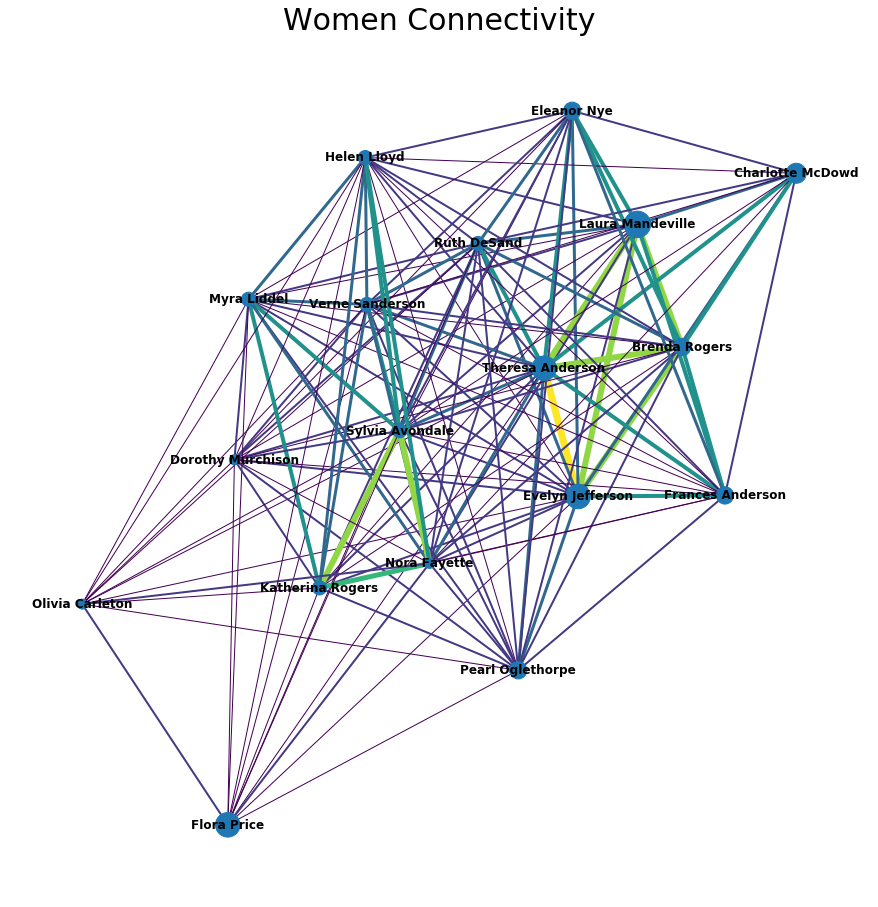

In [66]:
# Visualize the women network where connections are established between women who have attended the same events
plt.figure(figsize=(12,12))
weights = [ edata['weight'] for f, t, edata in W.edges( data=True ) ]
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw_spring(W, width=weights, 
        with_labels=True, 
        font_weight="bold", 
        edge_color=weights,
        node_size=[v * 100 for v in weights] )
plt.title('Women Connectivity', fontsize=30)
plt.show()

#### 4) about connectivity in the women network

In [84]:
print( "Average Node Connectivity: ", nx.average_node_connectivity( W ) )
print( "Number of edges: ", len( list( W.edges ) ) )
print( "Number of possible edges: ", int(18*17/2) )
print( "Percent connectivity: ", round(len( list( W.edges ) )/(18*17/2)*100,2 ), '%' )

Average Node Connectivity:  14.287581699346406
Number of edges:  139
Number of possible edges:  153
Percent connectivity:  90.85 %


The visualization of the Women network and the output above demonstrate that this network of 18 women is very saturated. Just over 90% of the possible connections between the women are established by shared attendence of social events.  
With this level of connectivity, it is very difficult to identify subgroups within the network


### Events Network

if edges are defined by shared attendents, what are the connectivity patterns between events?  
the following code follows the same approach used to build the women graph object, but here the roles are reversed: the network nodes will be the events and the and edges are established by shared attendence of women.

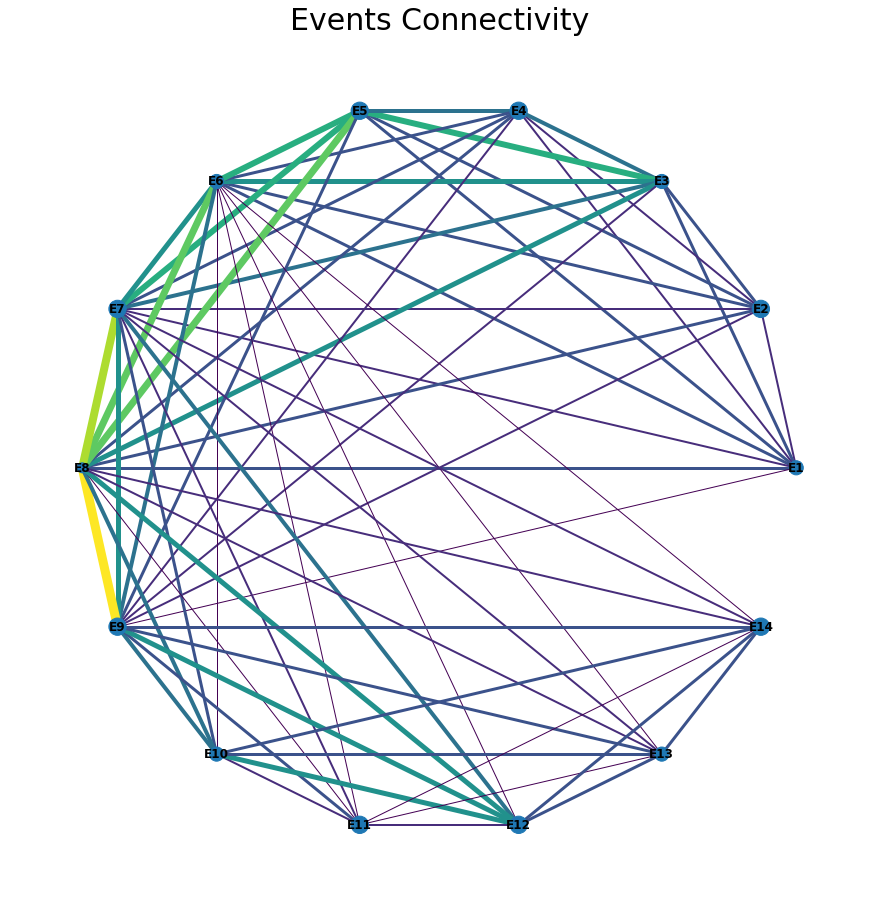

In [79]:
events_dict = {}
for event in events:
    # build a list of women for a specific event
    events_attendents = [split_edges[0][idx] for idx,e in enumerate(split_edges[1]) if e == event ]
    # asign as a value with event name as the key
    events_dict[ event ] = events_attendents

#instantiate an empty graph object
E = nx.Graph()

# for each woman in the list:
events2 = events.copy()
for event in events2:
    events2 = [e for e in events2 if e != event]
    # check against the other events in the list:
    for otherevent in events2:
        shared_attendents = list( set(events_dict[event]) & set(events_dict[otherevent]) )
        if len(shared_attendents)>0:
            E.add_edge( event, otherevent, weight=len(shared_attendents) )
            
# Visualize the events network where connections are established between events who have shared attendents
plt.figure(figsize=(12,12))
weights = [ edata['weight'] for f, t, edata in E.edges( data=True ) ]
#pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw_circular(E, width=weights, 
        with_labels=True, 
        font_weight="bold", 
        edge_color=weights,
        node_size=[v * 100 for v in weights] )
plt.title('Events Connectivity', fontsize=30)
plt.show()

In [83]:
print( "Average Node Connectivity: ", nx.average_node_connectivity( E ) )
print( "Number of edges: ", len( list( E.edges ) ) )
print( "Number of possible edges: ", int(14*13/2) )
print( "Percent connectivity: ", round(len( list( E.edges ) )/(14*13/2)*100,2 ), '%' )

Average Node Connectivity:  7.230769230769231
Number of edges:  66
Number of possible edges:  91
Percent connectivity:  72.53 %


In [85]:
E.get_edge_data('E8', 'E9')

{'weight': 9}

In [3]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


In [4]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")


#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


In [5]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")


#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


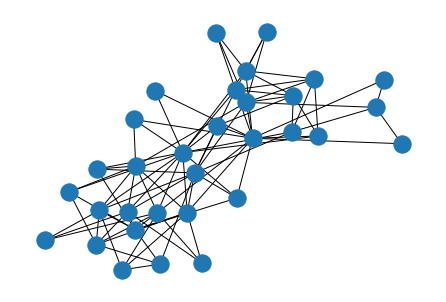

In [6]:
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()

<br>

## References

* Ghosh, Rumi, and Kristina Lerman. "Structure of heterogeneous networks." 2009 International Conference on Computational Science and Engineering. Vol. 4. IEEE, 2009.


<br><br>